In [4]:
import matplotlib.pyplot as mpl
import numpy as np
import pandas as pd
df = pd.read_csv(r'C:\Users\loren\Documents\GitHub\intro2ml_2021_final_project\Data\2k_sample_processed.csv')
print(df)

       weekday  hour  tweet_length  mentions_count  urls_count  photos_count  \
0       Monday    23            85               2           2             2   
1       Monday    22           160             156          63             2   
2       Monday    21           126               2           2             2   
3       Monday    20            47               2           2             2   
4       Monday    19            30               2           2             2   
...        ...   ...           ...             ...         ...           ...   
1995  Saturday     6            55               2           2            51   
1996    Friday    14           140               2           2             2   
1997    Friday    11            27               2           2             2   
1998  Thursday    15            29               2           2             2   
1999  Thursday    13            57               2           2            51   

      hashtags_count  quote_url_count  

In [5]:
y = df["retweets_count"]

In [7]:
def switch(day):
    if(day=="Monday"):
        return 1
    if(day=="Tuesday"):
        return 2
    if(day=="Wednesday"):
        return 3
    if(day=="Thursday"):
        return 4
    if(day=="Friday"):
        return 5
    if(day=="Saturday"):
        return 6
    if(day=="Sunday"):
        return 7
    else:
        print("ERRORE")

In [9]:
days=np.zeros((len(y),1),dtype=np.int32)
for i in range(len(days)):
    days[i]=switch(df["weekday"][i])

In [10]:
X=np.zeros((len(y),3))
for i in range(len(X)):
    X[i][0]=df["tweet_length"][i]
    X[i][1]=df["hour"][i]
    X[i][2]=days[i]

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
regr = RandomForestClassifier(n_estimators=250,max_depth=20, random_state=0)
regr.fit(X,y)

RandomForestClassifier(max_depth=20, n_estimators=250, random_state=0)

In [15]:
predpoints = np.zeros((len(y),1),dtype=np.int32)
for i in range(len(y)):
    predpoints[i] = regr.predict([[X[i][0],X[i][1],X[i][2]]])[0]

In [18]:
def errs():
    errori = np.zeros((len(y),1),dtype=np.int32)
    count=0
    for i in range(len(y)):
        errori[i]=abs(y[i]-predpoints[i])
        if(errori[i]==1):
            count+=1 
    mpl.scatter(X[:,0],errori)
    print(errori[0])
    print(count)
    print(count/len(y))
    erroripop = np.zeros((len(y),1),dtype=np.int32)
    count=0
    for i in range(len(y)):
        if(y[i]==1):
            erroripop[i]=abs(y[i]-predpoints[i])+1
            if(erroripop[i]==2):
                count+=1
    print(erroripop[0])
    print(count)
    print(count/1000)
    mpl.scatter(X[:,0],erroripop)
    errorinpop = np.zeros((len(y),1),dtype=np.int32)
    count=0
    for i in range(len(y)):
        if(y[i]==0):
            errorinpop[i]=abs(y[i]-predpoints[i])+1
            if(errorinpop[i]==2):
                count+=1
    print(errorinpop[0])
    print(count)
    print(count/1000)
    mpl.scatter(X[:,0],errorinpop)

[0]
13
0.0065
[0]
7
0.007
[1]
6
0.006


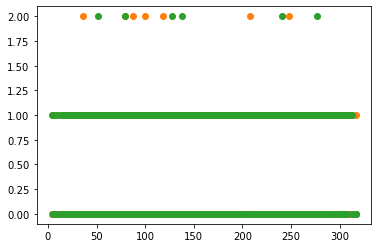

In [19]:
errs()

In [20]:
X=np.zeros((len(y),18),dtype=np.int32)
for i in range(len(X)):
    X[i][0]=df["tweet_length"][i]
    X[i][1]=df["hour"][i]
    X[i][2]=days[i]
    X[i][3]=df["mentions_count"][i]
    X[i][4]=df["urls_count"][i]
    X[i][5]=df["photos_count"][i]
    X[i][6]=df["hashtags_count"][i]
    X[i][7]=df["video_count"][i]
    X[i][8]=df["anger"][i]
    X[i][9]=df["anticipation"][i]
    X[i][10]=df["disgust"][i]
    X[i][11]=df["fear"][i]
    X[i][12]=df["joy"][i]
    X[i][13]=df["sadness"][i]
    X[i][14]=df["surprise"][i]
    X[i][15]=df["trust"][i]
    X[i][16]=df["positive"][i]
    X[i][17]=df["negative"][i]

In [21]:
regr = RandomForestClassifier(n_estimators=250,max_depth=20, random_state=0)
regr.fit(X,y)

RandomForestClassifier(max_depth=20, n_estimators=250, random_state=0)

In [23]:
predpoints = np.zeros((len(y),1),dtype=np.int32)
for i in range(len(y)):
    predpoints[i] = regr.predict([X[i,:]])[0]

[0]
8
0.004
[0]
1
0.001
[1]
7
0.007


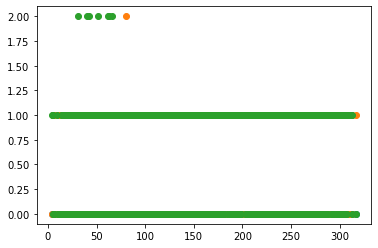

In [24]:
errs()